In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_sa = pd.read_csv("logs/sa/log0.csv")
df_sa["model"] = "SA"
df_ma = pd.read_csv("logs/ma/log0.csv")
df_ma["model"] = "MA"

df = pd.concat((df_ma, df_sa))

<Axes: title={'center': 'Energy landscape Across Solvers'}, xlabel='Iteration Number', ylabel='Energy'>

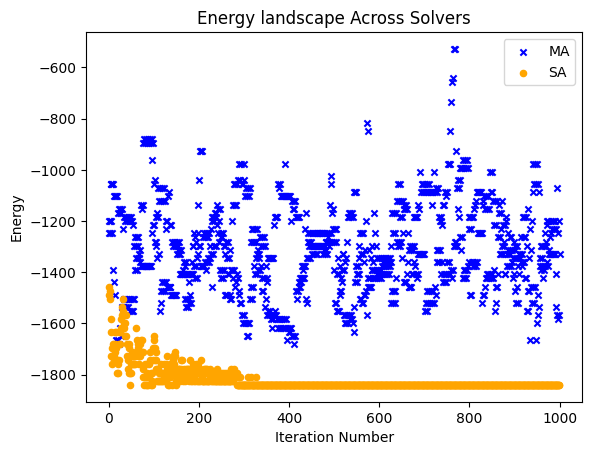

In [3]:
df[df["model"] == "MA"].plot(kind="scatter", marker="x", c = "blue", x = "iteration_stamp", y = "energy", label="MA", title="Energy landscape Across Solvers", ylabel="Energy", xlabel="Iteration Number", ax=plt.gca())
df[df["model"] == "SA"].plot(kind="scatter", marker="o", c = "orange", x = "iteration_stamp", y = "energy", label="SA", title="Energy landscape Across Solvers", ylabel="Energy", xlabel="Iteration Number", ax=plt.gca())

<Axes: title={'center': 'Energy landscape Across Solvers'}, xlabel='Time (ns)', ylabel='Energy'>

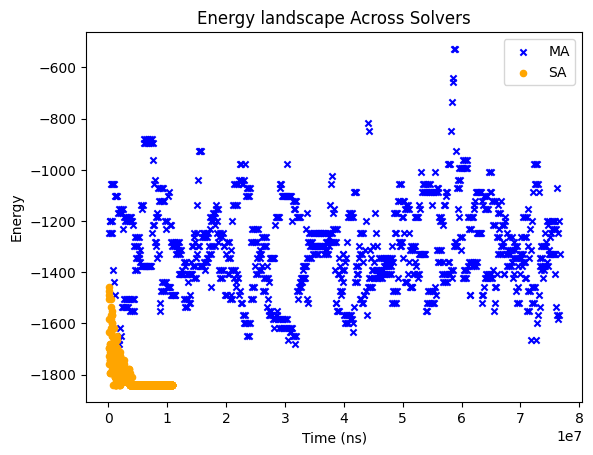

In [4]:
df[df["model"] == "MA"].plot(kind="scatter", marker="x", c = "blue", x = "time_stamp", y = "energy", label="MA", title="Energy landscape Across Solvers", ylabel="Energy", xlabel="Time (ns)", ax=plt.gca())
df[df["model"] == "SA"].plot(kind="scatter", marker="o", c = "orange", x = "time_stamp", y = "energy", label="SA", title="Energy landscape Across Solvers", ylabel="Energy", xlabel="Time (ns)", ax=plt.gca())